In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import folium # plot map
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans # model

## Load the dataset

In [2]:
data=pd.read_csv("route/uio_clean.csv")
data

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
1,2,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456
2,3,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314
...,...,...,...,...,...,...,...,...,...,...,...,...
32361,32362,Quito,2016-10-27 08:36:09,2016-10-27 09:19:59,-78.485382,-0.174790,-78.487138,-0.175598,N,2631,4872,2006
32362,32363,Quito,2016-10-27 09:30:21,2016-10-28 05:32:38,-78.377726,-0.212579,-78.388333,-0.190998,N,28938,2906,31
32363,32364,Quito,2016-10-27 12:10:18,2016-10-27 06:33:53,-78.477247,-0.107514,-78.490093,-0.100859,N,66216,23607,958
32364,32365,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,-78.550264,-0.256730,-78.550306,-0.256756,N,91,43,70


## EDA

In [3]:
# calculate vendor and how much pickup activities
data['vendor_id'].value_counts()

vendor_id
Quito                     31875
Quito Cabify Lite           400
Quito Cabify Executive       88
Quito UberX                   3
Name: count, dtype: int64

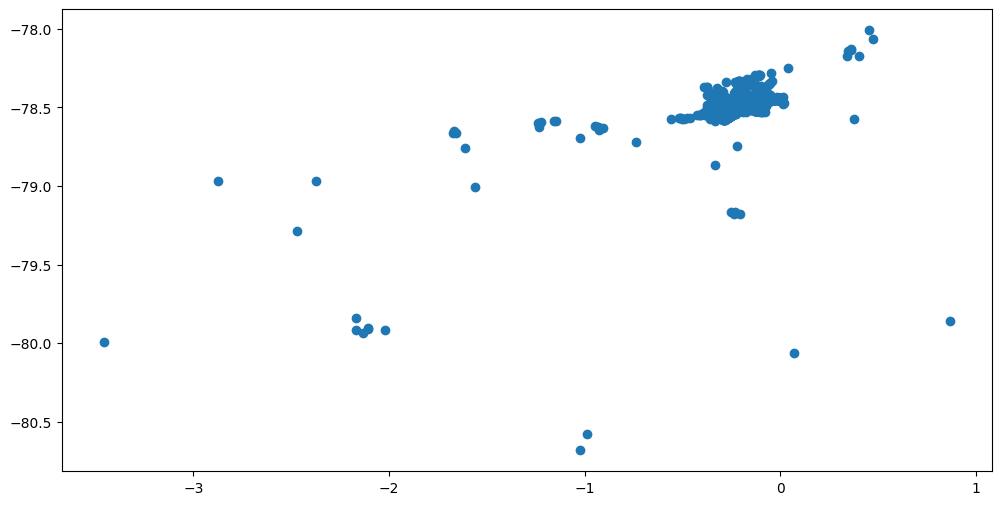

In [4]:
# chose one vendor and plot it
taxi_libre = data[data['vendor_id'] == 'Quito']

plt.figure(figsize=(12, 6))
plt.scatter(taxi_libre['pickup_latitude'], taxi_libre['pickup_longitude'])
plt.show()

## Kmeans model

In [5]:
# use kmeans with centeroid random to get ceteroid of found cluster
kmeans = KMeans(n_clusters=3, random_state=10)

taxi_libre['cluster'] = kmeans.fit_predict(taxi_libre[['pickup_latitude', 'pickup_longitude']])

C:\Users\HP\AppData\Local\Temp\ipykernel_6552\196489740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_libre['cluster'] = kmeans.fit_predict(taxi_libre[['pickup_latitude', 'pickup_longitude']])


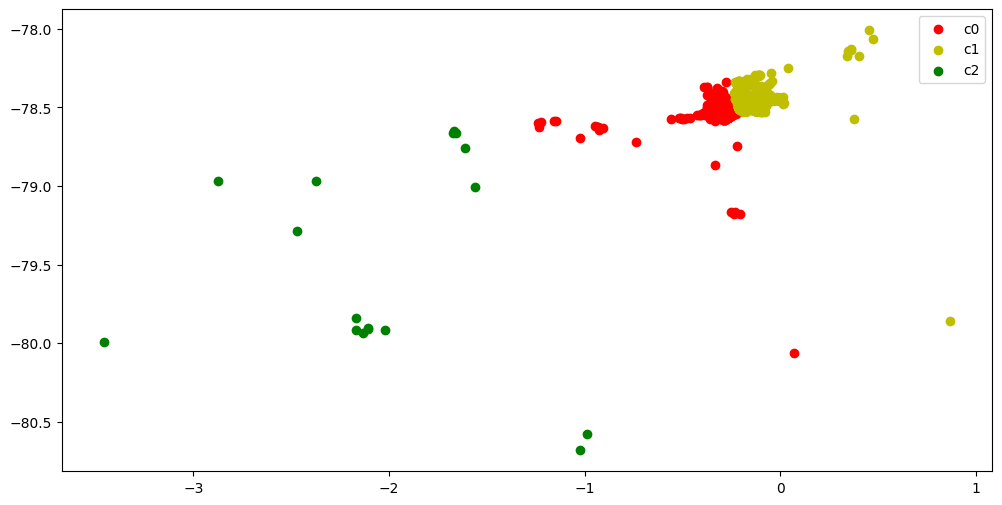

In [6]:
# plot initial cluster
plt.figure(figsize=(12, 6))
plt.scatter(taxi_libre['pickup_latitude'][taxi_libre['cluster'] == 0], taxi_libre['pickup_longitude'][taxi_libre['cluster'] == 0], c='r', label='c0')
plt.scatter(taxi_libre['pickup_latitude'][taxi_libre['cluster'] == 1], taxi_libre['pickup_longitude'][taxi_libre['cluster'] == 1], c='y', label='c1')
plt.scatter(taxi_libre['pickup_latitude'][taxi_libre['cluster'] == 2], taxi_libre['pickup_longitude'][taxi_libre['cluster'] == 2], c='g', label='c2')
plt.legend()
plt.show()

In [7]:
c0_count = taxi_libre[taxi_libre['cluster'] == 0].shape[0]
c1_count = taxi_libre[taxi_libre['cluster'] == 1].shape[0]
c2_count = taxi_libre[taxi_libre['cluster'] == 2].shape[0]
print('cluster0: {}\ncluster1: {}\ncluster2: {}'.format(c0_count, c1_count, c2_count))

cluster0: 8531
cluster1: 23327
cluster2: 17


In [8]:
# drop cluster 1 and 2
taxi_libre0 = taxi_libre[taxi_libre['cluster'] == 0]
taxi_libre0.drop(['cluster'], axis=1, inplace=True)
taxi_libre0.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6552\3721995386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_libre0.drop(['cluster'], axis=1, inplace=True)


,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314
7,8,Quito,2016-09-18 11:06:58,2016-09-18 11:53:59,-78.529780,-0.249149,-78.361078,-0.124627,N,2821,46418,302
11,12,Quito,2016-09-17 04:15:09,2016-09-18 12:28:12,-78.511022,-0.239903,-78.509628,-0.238126,N,72784,251,2418


In [9]:
taxi_libre0['cluster'] = kmeans.fit_predict(taxi_libre0[['pickup_latitude', 'pickup_longitude']])
taxi_libre0.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6552\3042176937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_libre0['cluster'] = kmeans.fit_predict(taxi_libre0[['pickup_latitude', 'pickup_longitude']])


,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,cluster
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346,1
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302,0
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314,1
7,8,Quito,2016-09-18 11:06:58,2016-09-18 11:53:59,-78.529780,-0.249149,-78.361078,-0.124627,N,2821,46418,302,1
11,12,Quito,2016-09-17 04:15:09,2016-09-18 12:28:12,-78.511022,-0.239903,-78.509628,-0.238126,N,72784,251,2418,1


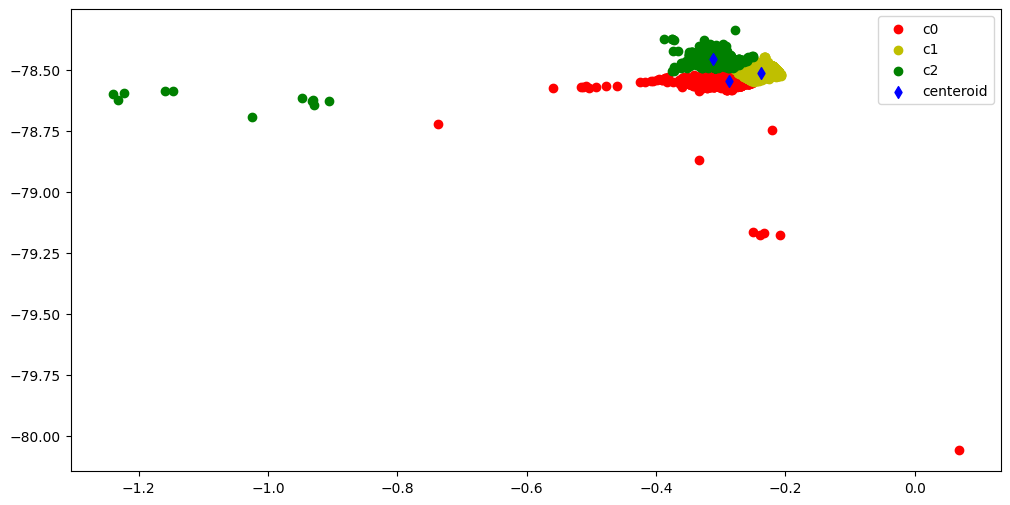

In [10]:
# where centeroid of cluster
centeroid = kmeans.cluster_centers_
plt.figure(figsize=(12, 6))
plt.scatter(taxi_libre0['pickup_latitude'][taxi_libre0['cluster'] == 0], taxi_libre0['pickup_longitude'][taxi_libre0['cluster'] == 0], c='r', label='c0')
plt.scatter(taxi_libre0['pickup_latitude'][taxi_libre0['cluster'] == 1], taxi_libre0['pickup_longitude'][taxi_libre0['cluster'] == 1], c='y', label='c1')
plt.scatter(taxi_libre0['pickup_latitude'][taxi_libre0['cluster'] == 2], taxi_libre0['pickup_longitude'][taxi_libre0['cluster'] == 2], c='g', label='c2')
plt.scatter(centeroid[:,0], centeroid[:,1], c='b', marker='d', label='centeroid')
plt.legend()
plt.show()

In [11]:
centeroid

array([[ -0.2864256 , -78.5461389 ],
       [ -0.23780617, -78.51473229],
       [ -0.3124167 , -78.45360232]])

In [12]:
# show port location in map
m = folium.Map(
    location=[centeroid[0][0], centeroid[0][1]],
    set_zoom=17,
)

for i in range(centeroid.shape[0]):
    folium.Marker([centeroid[i][0], centeroid[i][1]], poop=str(i)).add_to(m)

m

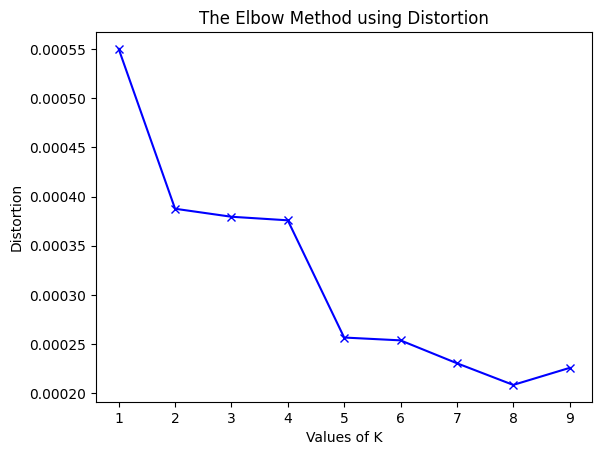

In [13]:
# Elbow plot for determining the number of clusters
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(taxi_libre[['pickup_latitude', 'pickup_longitude']])
    kmeanModel.fit(taxi_libre[['pickup_latitude', 'pickup_longitude']])

    distortions.append(((sum(np.min(cdist(taxi_libre[['pickup_latitude', 'pickup_longitude']], kmeanModel.cluster_centers_,'euclidean'), axis=1)) / taxi_libre[['pickup_latitude', 'pickup_longitude']].shape[0])/100))
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(taxi_libre[['pickup_latitude', 'pickup_longitude']], kmeanModel.cluster_centers_,'euclidean'), axis=1)) / taxi_libre[['pickup_latitude', 'pickup_longitude']].shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()